<h2>MNIST dataset in Keras library</h2>

## Imports

In [1]:
# - TensorFlow
import tensorflow as tf
# - Dataset
from tensorflow.keras.datasets import mnist
# - Helper libraries
import numpy as np
import pandas as pd
import time
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical
# - Graph plots
%matplotlib inline
from matplotlib import pyplot as plt
# - Keras models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Convolution2D, MaxPooling2D

# Print some stuff
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.2.0


<h2>Load data</h2>

In [2]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train_raw), (X_test, y_test_raw) = mnist.load_data()

# Convert to float values and normalize between 0...1
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255 
X_test /= 255

# Preprocess class labels
# Convert labels to 10-dimensional one-hot vectors
y_train = to_categorical(y_train_raw, 10)
y_test = to_categorical(y_test_raw, 10)

print("Training instances: {}".format(X_train.shape[0]))
print("Test instances: {}".format(X_test.shape[0]))
print()
print("Structure of training set: {}".format(X_train.shape))
print("Structure of labels set: {}".format(y_train.shape))

Training instances: 60000
Test instances: 10000

Structure of training set: (60000, 28, 28)
Structure of labels set: (60000, 10)


<h2>Pre-process data for 1D or 2D inputs</h2>

In [3]:
# Preprocess for 1D input data
X_train_1D = X_train.reshape(X_train.shape[0], 784)
X_test_1D = X_test.reshape(X_test.shape[0], 784)
print("1D shape:", X_train_1D.shape)

# Preprocess for 2D input data
X_train_2D = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_2D = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("2D shape:", X_train_2D.shape)

1D shape: (60000, 784)
2D shape: (60000, 28, 28, 1)


## Linear model

Epoch 1/6
844/844 [==============================] - 1s 1ms/step - loss: 0.5758 - accuracy: 0.8542 - val_loss: 0.2993 - val_accuracy: 0.9238
Epoch 2/6
844/844 [==============================] - 1s 944us/step - loss: 0.3371 - accuracy: 0.9063 - val_loss: 0.2581 - val_accuracy: 0.9295
Epoch 3/6
844/844 [==============================] - 1s 929us/step - loss: 0.3063 - accuracy: 0.9143 - val_loss: 0.2438 - val_accuracy: 0.9340
Epoch 4/6
844/844 [==============================] - 1s 931us/step - loss: 0.2913 - accuracy: 0.9184 - val_loss: 0.2379 - val_accuracy: 0.9355
Epoch 5/6
844/844 [==============================] - 1s 980us/step - loss: 0.2822 - accuracy: 0.9212 - val_loss: 0.2311 - val_accuracy: 0.9375
Epoch 6/6
844/844 [==============================] - 1s 913us/step - loss: 0.2755 - accuracy: 0.9223 - val_loss: 0.2293 - val_accuracy: 0.9353

Test Accuracy: 92.56%
Time elapsed: 5.43 sec


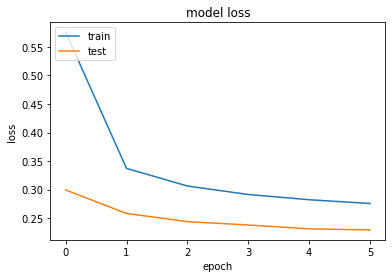

In [4]:
# Create Linear Softmax model
lin_clf = Sequential()
lin_clf.add(Dense(10, input_dim=784, activation="softmax"))

# Compile model
lin_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = lin_clf.fit(X_train_1D, y_train, batch_size=64, epochs=6, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = lin_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## NN model

Epoch 1/6
844/844 [==============================] - 1s 2ms/step - loss: 0.3592 - accuracy: 0.8915 - val_loss: 0.1153 - val_accuracy: 0.9663
Epoch 2/6
844/844 [==============================] - 1s 2ms/step - loss: 0.1671 - accuracy: 0.9495 - val_loss: 0.0893 - val_accuracy: 0.9738
Epoch 3/6
844/844 [==============================] - 1s 1ms/step - loss: 0.1251 - accuracy: 0.9612 - val_loss: 0.0764 - val_accuracy: 0.9785
Epoch 4/6
844/844 [==============================] - 1s 1ms/step - loss: 0.1050 - accuracy: 0.9676 - val_loss: 0.0763 - val_accuracy: 0.9763
Epoch 5/6
844/844 [==============================] - 1s 1ms/step - loss: 0.0869 - accuracy: 0.9729 - val_loss: 0.0684 - val_accuracy: 0.9802
Epoch 6/6
844/844 [==============================] - 1s 1ms/step - loss: 0.0820 - accuracy: 0.9734 - val_loss: 0.0640 - val_accuracy: 0.9803

Test Accuracy: 97.80%
Time elapsed: 8.26 sec


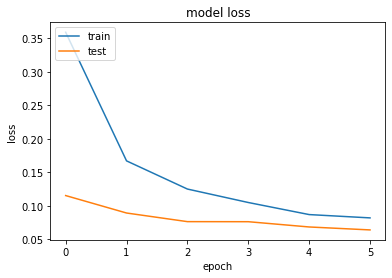

In [5]:
# Create Neural Net Softmax model
nn_clf = Sequential()
# - first Dense
nn_clf.add(Dense(128, input_dim=784, activation="relu", kernel_initializer="normal"))
nn_clf.add(Dropout(0.2))
# - second Dense
nn_clf.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
nn_clf.add(Dropout(0.2))
# - output
nn_clf.add(Dense(10, activation="softmax"))

# Compile model
nn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = nn_clf.fit(X_train_1D, y_train, batch_size=64, epochs=6, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = nn_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## ConvNet model

Epoch 1/8
844/844 [==============================] - 23s 28ms/step - loss: 0.3128 - accuracy: 0.9006 - val_loss: 0.0642 - val_accuracy: 0.9807
Epoch 2/8
844/844 [==============================] - 24s 28ms/step - loss: 0.1066 - accuracy: 0.9665 - val_loss: 0.0517 - val_accuracy: 0.9850
Epoch 3/8
844/844 [==============================] - 23s 28ms/step - loss: 0.0840 - accuracy: 0.9742 - val_loss: 0.0406 - val_accuracy: 0.9873
Epoch 4/8
844/844 [==============================] - 24s 28ms/step - loss: 0.0697 - accuracy: 0.9786 - val_loss: 0.0346 - val_accuracy: 0.9903
Epoch 5/8
844/844 [==============================] - 23s 27ms/step - loss: 0.0609 - accuracy: 0.9805 - val_loss: 0.0328 - val_accuracy: 0.9905
Epoch 6/8
844/844 [==============================] - 23s 28ms/step - loss: 0.0548 - accuracy: 0.9825 - val_loss: 0.0314 - val_accuracy: 0.9905
Epoch 7/8
844/844 [==============================] - 23s 28ms/step - loss: 0.0514 - accuracy: 0.9841 - val_loss: 0.0313 - val_accuracy: 0.9900

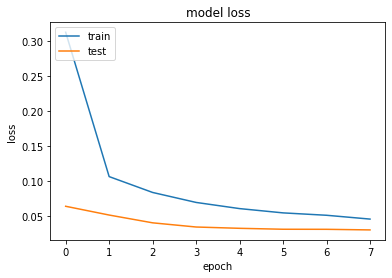

In [6]:
# Create ConvNet model
cnn_clf = Sequential()
# - first conv/pool 
cnn_clf.add(Convolution2D(32, (3,3), input_shape=(28,28,1), activation="relu", padding="same", kernel_initializer="normal"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 14x14
cnn_clf.add(Dropout(0.3))
# - second conv/pool
cnn_clf.add(Convolution2D(32, (3,3), activation="relu", padding="same", kernel_initializer="he_uniform"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 7x7
cnn_clf.add(Dropout(0.3))
# - fully connected
cnn_clf.add(Flatten())
cnn_clf.add(Dense(128, activation="relu"))
cnn_clf.add(Dropout(0.3))
# - output
cnn_clf.add(Dense(10, activation="softmax"))

# Compile model
cnn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = cnn_clf.fit(X_train_2D, y_train, batch_size=64, epochs=8, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = cnn_clf.evaluate(X_test_2D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Confusion matrix

In [9]:
# Make predictions
y_pred = cnn_clf.predict(X_test_2D)

# Confusion matrix
conf_mx = confusion_matrix(
    np.argmax(y_test,axis=1),
    np.argmax(y_pred, axis=1))
print(conf_mx)

[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1131    1    1    0    0    1    1    0    0]
 [   1    2 1013    0    4    0    0   12    0    0]
 [   0    0    1 1004    0    2    0    3    0    0]
 [   0    0    0    0  977    0    1    0    0    4]
 [   2    0    0    2    0  886    2    0    0    0]
 [   4    2    0    0    1    6  945    0    0    0]
 [   0    0    1    1    0    0    0 1024    1    1]
 [   5    1    2    1    1    2    0    3  956    3]
 [   0    2    0    1    5    3    0    4    0  994]]


## Dimensionality Reduction

In [10]:
# Create PCA
pca = PCA(n_components=0.95)
pca.fit(X_train_1D)
# Reduce dimensionality on training and test sets
X_train_1D_dr = pca.transform(X_train_1D)
X_test_1D_dr = pca.transform(X_test_1D)
# Show dataset shape
print("Training set:",X_train_1D_dr.shape)
print("Test set:",X_test_1D_dr.shape)

Training set: (60000, 154)
Test set: (10000, 154)


## NN model on reduced dataset

Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 2s 46us/sample - loss: 0.3946 - accuracy: 0.8868 - val_loss: 0.1260 - val_accuracy: 0.9632
Epoch 2/8
54000/54000 [==============================] - 2s 38us/sample - loss: 0.1682 - accuracy: 0.9492 - val_loss: 0.0871 - val_accuracy: 0.9755
Epoch 3/8
54000/54000 [==============================] - 2s 38us/sample - loss: 0.1249 - accuracy: 0.9618 - val_loss: 0.0752 - val_accuracy: 0.9793
Epoch 4/8
54000/54000 [==============================] - 2s 38us/sample - loss: 0.1015 - accuracy: 0.9683 - val_loss: 0.0731 - val_accuracy: 0.9787
Epoch 5/8
54000/54000 [==============================] - 2s 38us/sample - loss: 0.0882 - accuracy: 0.9724 - val_loss: 0.0688 - val_accuracy: 0.9802
Epoch 6/8
54000/54000 [==============================] - 2s 38us/sample - loss: 0.0777 - accuracy: 0.9747 - val_loss: 0.0684 - val_accuracy: 0.9792
Epoch 7/8
54000/54000 [==============================] - 2s 40u

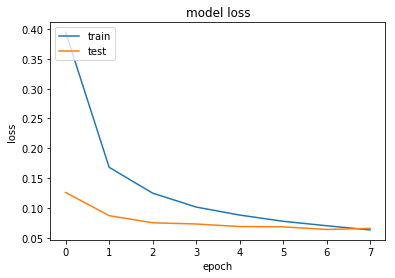

In [12]:
# Create Neural Net Softmax model for the reduced size dataset
snn_clf = Sequential()
# - first Dense
snn_clf.add(Dense(128, input_dim=154, activation="relu", kernel_initializer="normal"))
snn_clf.add(Dropout(0.2))
# - second Dense
snn_clf.add(Dense(128, activation="relu", kernel_initializer="normal"))
snn_clf.add(Dropout(0.2))
# - output
snn_clf.add(Dense(10, activation="softmax"))

# Compile model
snn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = snn_clf.fit(X_train_1D_dr, y_train, batch_size=64, epochs=8, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = snn_clf.evaluate(X_test_1D_dr, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Predict examples</h2>

Predicted: 7
Actual: 7


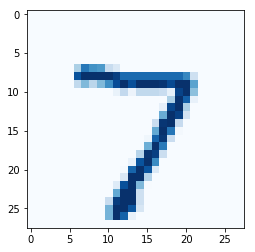

Predicted: 2
Actual: 2


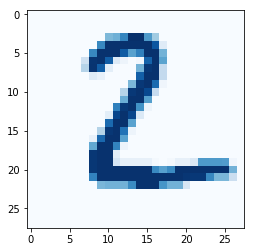

Predicted: 1
Actual: 1


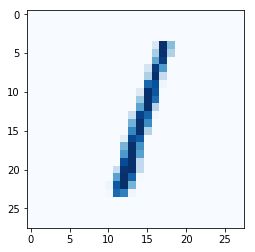

In [13]:
# Examples to classify
examples = X_test_2D[:3]

res = np.argmax(cnn_clf.predict(examples), axis=1)

for i in range(0,len(res)):
    print("Predicted:",res[i])
    print("Actual:",y_test_raw[i])
    plt.imshow(X_test[i], cmap=plt.cm.Blues)
    plt.show()